In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
traindata=pd.read_csv('FB_training_data.csv')
traindata=traindata.iloc[:,1].values

In [ ]:
traindata

array([ 78.580002,  77.980003,  77.230003, ..., 208.669998, 207.860001,
       204.      ])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
traindata=scaler.fit_transform(traindata.reshape(-1,1))

In [ ]:
x_traindata=[]
y_traindata=[]

In [ ]:
for i in range(40,len(traindata)):
  x_traindata.append(traindata[i-40:i,0])
  y_traindata.append(traindata[i,0])

In [ ]:
x_traindata=np.array(x_traindata)
y_traindata=np.array(y_traindata)

In [ ]:
print(x_traindata.shape)#because we need 40 days data
print(y_traindata.shape)


(1218, 40, 1)
(1218,)


In [ ]:
x_traindata=np.reshape(x_traindata,(x_traindata.shape[0],x_traindata.shape[1],1))

In [ ]:
#creating RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
rnn=Sequential()
rnn.add(LSTM(units=32,return_sequences=True,input_shape=(x_traindata.shape[1],1)))
rnn.add(Dropout(0.2))#for diabling node
rnn.add(LSTM(units=32,return_sequences=True))
rnn.add(Dropout(0.2))#for diabling node
rnn.add(LSTM(units=16,return_sequences=True))
rnn.add(Dropout(0.2))#for diabling node
rnn.add(LSTM(units=16))
rnn.add(Dropout(0.2))#for diabling node
rnn.add(Dense(units=1))
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 40, 32)            4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 40, 32)            8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 32)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 40, 16)            3136      
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 16)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 16)               

In [ ]:
rnn.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
rnn.fit(x_traindata,y_traindata,epochs=100,batch_size=128)

Epoch 1/100
10/10 [==============================] - 1s 89ms/step - loss: 0.0073
Epoch 2/100
10/10 [==============================] - 1s 85ms/step - loss: 0.0069
Epoch 3/100
10/10 [==============================] - 1s 84ms/step - loss: 0.0068
Epoch 4/100
10/10 [==============================] - 1s 88ms/step - loss: 0.0069
Epoch 5/100
10/10 [==============================] - 1s 87ms/step - loss: 0.0072
Epoch 6/100
10/10 [==============================] - 1s 85ms/step - loss: 0.0061
Epoch 7/100
10/10 [==============================] - 1s 88ms/step - loss: 0.0065
Epoch 8/100
10/10 [==============================] - 1s 91ms/step - loss: 0.0063
Epoch 9/100
10/10 [==============================] - 1s 84ms/step - loss: 0.0065
Epoch 10/100
10/10 [==============================] - 1s 85ms/step - loss: 0.0060
Epoch 11/100
10/10 [==============================] - 1s 89ms/step - loss: 0.0061
Epoch 12/100
10/10 [==============================] - 1s 91ms/step - loss: 0.0060
Epoch 13/100
10/10 [=====

In [ ]:
testdata=pd.read_csv('FB_test_data.csv')
testdata=testdata.iloc[:,1].values

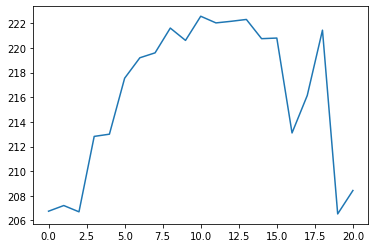

In [ ]:
plt.plot(testdata)

In [ ]:
unscaledtraindata = pd.read_csv('FB_training_data.csv')
unscaledtestdata =pd.read_csv('FB_test_data.csv')

In [ ]:
alldata=pd.concat((unscaledtraindata['Open'],unscaledtestdata['Open']),axis=0)

In [ ]:
x_testdata=alldata[len(alldata)-len(testdata)-40:].values
x_testdata=np.reshape(x_testdata,(-1,1))

In [ ]:
x_testdata=scaler.transform(x_testdata)

In [ ]:
final_x_testdata=[]
for i in range(40,len(x_testdata)):
    final_x_testdata.append(x_testdata[i-40:i,0])
final_x_testdata=np.array(final_x_testdata)

In [ ]:
final_x_testdata=np.reshape(final_x_testdata,(final_x_testdata.shape[0],final_x_testdata.shape[1],1))

In [ ]:
pred=rnn.predict(final_x_testdata)

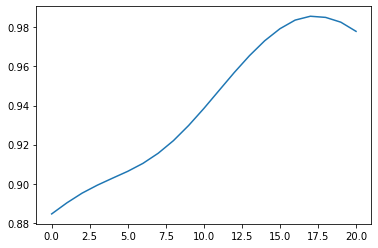

In [ ]:
plt.clf()
plt.plot(pred)

In [ ]:
unscaled_pred=scaler.inverse_transform(pred)

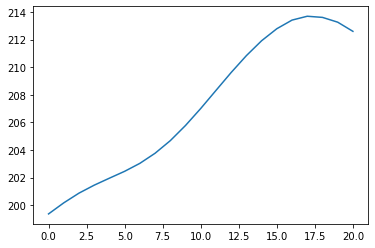

In [ ]:
plt.clf()
plt.plot(unscaled_pred)

Text(0.5, 1.0, 'Facebook stock price predictions')

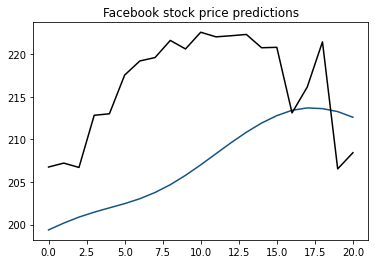

In [ ]:
plt.plot(unscaled_pred,color='#135485',label="Predications")
plt.plot(testdata,color="black",label="Real data")
plt.title("Facebook stock price predictions")